In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

from textblob import TextBlob
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!unzip /content/drive/MyDrive/gatech/quora-question-pairs.zip

Archive:  /content/drive/MyDrive/gatech/quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


Archive:  /content/drive/MyDrive/MLProject/quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
!unzip /content/train.csv.zipn


Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
os.listdir()

['.config',
 'train.csv.zip',
 'train.csv',
 'sample_submission.csv.zip',
 'drive',
 'test.csv.zip',
 'test.csv',
 'sample_data']

In [ ]:
pwd

'/content'

In [ ]:
df =pd.read_csv("/content/train.csv")

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
test_df = pd.read_csv("/content/test.csv")

In [ ]:
test_df

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [ ]:
pwd

'/content'

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-11-07 22:22:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-11-07 22:22:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-11-07 22:22:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
path_to_glove_file = "/content/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
countr = 0
for i,j in embeddings_index.items():
  print(i)
  countr+=1 
  if(countr == 100):
    break

the
,
.
of
to
and
in
a
"
's
for
-
that
on
is
was
said
with
he
as
it
by
at
(
)
from
his
''
``
an
be
has
are
have
but
were
not
this
who
they
had
i
which
will
their
:
or
its
one
after
new
been
also
we
would
two
more
'
first
about
up
when
year
there
all
--
out
she
other
people
n't
her
percent
than
over
into
last
some
government
time
$
you
years
if
no
world
can
three
do
;
president
only
state
million
could
us
most
_
against
u.s.


In [ ]:
print(df.at[0, 'question1'])
x = nltk.word_tokenize(df.at[0, 'question1'])
print(x)

What is the step by step guide to invest in share market in india?
['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india', '?']


In [ ]:
def create_new_data(data) :

  existing_pairs = set()
  transitivity_dict = dict()
  q_mapping = dict()

  sentence1 = []
  sentence2 = []
  labels = []
  for index, row in tqdm(data.iterrows(), total=data.shape[0]):

    q1id = row['qid1']
    q2id = row['qid2']

    q1 = row['question1']
    q2 = row['question2']

    q_mapping[q1id] = q1
    q_mapping[q2id] = q2


    label = row['is_duplicate']

    q1row = transitivity_dict.get(q1id,[])
    q2row = transitivity_dict.get(q2id,[])

    if (q1id,q2id) not in existing_pairs and (q2id,q1id) not in existing_pairs: 
      existing_pairs.add((q1id,q2id))
      sentence1.append(q1)
      sentence2.append(q2)
      labels.append(label)
      q1row.append((q2id,label))
      q2row.append((q1id,label))
    
    transitivity_dict[q1id] = q1row
    transitivity_dict[q2id] = q2row

  for key,value in tqdm(transitivity_dict.items()) :
    # print("1",value)
    qrow = transitivity_dict.get(key,[])
    q = q_mapping[key]
    # if (key,key) not in existing_pairs: 
    #       existing_pairs.add((key,key))
    #       sentence1.append(q)
    #       sentence2.append(q)
    #       labels.append(1)
    if len(qrow) > 1 :
      i = 0
      while i < len(qrow) :
        j = i + 1
        while j < len(qrow) :
          q1id = qrow[i][0]
          q2id = qrow[j][0]
          q1 = q_mapping[q1id]
          q2 = q_mapping[q2id]
          l1 = qrow[i][1]
          l2 = qrow[j][1]
          if l1 == 0 and l2 == 0 :
            j += 1
            continue
          label = l1 if l1==l2 else 0

          # if label == 1 :
          #   count += 1
          if (q1id,q2id) not in existing_pairs and (q2id,q1id) not in existing_pairs: 
            existing_pairs.add((q1id,q2id))
            sentence1.append(q1)
            sentence2.append(q2)
            labels.append(label)
           
          j += 1
        i += 1
  return sentence1,sentence2,labels


    

    
    




In [ ]:
def remove_punctuation(text):
    # print("Before Punctuation Removal: ",text)
    punctuationfree="".join([i if i not in string.punctuation else " " for i in text ])
    # print("After Punctuation Removal: ",punctuationfree)
    return punctuationfree


def toLower(text) :
    text = text.lower()
    return text

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    # print("Before Stopword Removal: ",text)
    output= [i for i in text if i not in stopwords]
    # print("After Stopword Removal: ",output)
    return output

def correct_spelling(text):
    output = [str(TextBlob(word).correct()) for word in text]
    return output

#defining the object for stemming
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(tagged_text):
    # print("Before Lemmatization: ", tagged_text)
    lemm_text = [wordnet_lemmatizer.lemmatize(word, tag) if tag is not None else word for word, tag in tagged_text]
    # print("After Lemmatization: ", lemm_text)
    return lemm_text

def tokenizeText(text):
    # print("Before Tokenization: ",text)
    output = nltk.word_tokenize(text)
    # print("After Tokenization: ",output)
    return output


def pos_tag_helper(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

def pos_tagger(text):
  # print("Before POS Tagging: ",text)
  pos_tagged = nltk.pos_tag(text)
  pos_tagged = list(map(lambda x: (x[0], pos_tag_helper(x[1])), pos_tagged))
  # print("After POS Tagging: ",pos_tagged)
  return pos_tagged


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
import string

In [ ]:
def preprocess(text):
    # print("Sentence ", text)
    text = remove_punctuation(text)
    text = toLower(text)
    text_arr = tokenizeText(text)
    text_arr = remove_stopwords(text_arr)
    # text_arr = correct_spelling(text_arr)
    #text_arr = stemming(text_arr)
    text_tagged = pos_tagger(text_arr)
    text_arr = lemmatizer(text_tagged)
    # print("After preprocess ", text_arr)
    return text_arr


In [ ]:
df = pd.read_csv("/content/train.csv")
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

df["question1_arr"] = ""
df["question2_arr"] = ""

(404290, 6)
(404287, 6)


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_arr,question2_arr
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,,
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,,
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,,
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,,
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,,
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,,
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,,
404287,404287,537928,537929,What is one coin?,What's this coin?,0,,
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,,


In [ ]:
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    # print("")
    # print("")
    # print("")
    # print("")
    # print("")
    # if(index == 10) :
    #   break
    sentence1 = row['question1']
    sentence2 = row['question2']

    sentence1_arr = preprocess(sentence1)
    sentence2_arr = preprocess(sentence2)

    df.at[index, "question1_arr"] = sentence1_arr
    df.at[index, "question2_arr"] = sentence2_arr
  
    # break


    
    

100%|██████████| 404287/404287 [12:07<00:00, 555.78it/s]


In [ ]:
import pickle
p_q1 = df['question1_arr'].tolist()
p_q2 = df['question2_arr'].tolist()
l = df['is_duplicate'].tolist()
processed_wo_transitive = [p_q1,p_q2,l]
with open("processed_data_wo_transitive.pkl", 'wb') as f:
  pickle.dump(processed_wo_transitive, f)



404287

In [ ]:
from google.colab import files
files.download("processed_data_wo_transitive.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence1,sentence2,labels = create_new_data(df)


100%|██████████| 537933/537933 [00:02<00:00, 244599.82it/s]


'What is the step by step guide to invest in share market in india?'

In [ ]:
import pickle
sentence_data = []
sentence_data.append(sentence1)
sentence_data.append(sentence2)
sentence_data.append(labels)
with open("sentence_data.pkl", 'wb') as f:
  pickle.dump(sentence_data, f)

In [ ]:
!cp /content/sentence_data.pkl /content/drive/MyDrive/MLProject/

In [ ]:
length = len(sentence1)
processed_q1 = []
processed_q2 = []
for i in tqdm(range(length),total=length) :
  q1 = sentence1[i]
  q2 = sentence2[i]

  q1_arr = preprocess(str(q1))
  q2_arr = preprocess(str(q2))

  processed_q1.append(q1_arr)
  processed_q2.append(q2_arr)

100%|██████████| 577240/577240 [15:51<00:00, 606.50it/s]


In [ ]:
import pickle
processed_data = []
processed_data.append(processed_q1)
processed_data.append(processed_q2)
processed_data.append(labels)
with open("processed_data_2.pkl", 'wb') as f:
  pickle.dump(processed_data, f)

In [ ]:
from google.colab import files
files.download("processed_data_2.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = np.array([])

In [ ]:
x.shape

(0,)

In [ ]:
x

array([], dtype=float64)

In [ ]:
unk_words = []

def embedding_func(text_arr):

    countr = 0
    unk_exist_countr = 0
    embed_arr = []
    for i in text_arr:
      if(i in embeddings_index):
          if(i == "unk"):
              unk_exist_countr+= 1

          embed_arr.append(embeddings_index[i])
      else:
          # print("Unknown word ", i)
          unk_words.append(i)
          countr += 1
          embed_arr.append(embeddings_index["unk"])
    
    embed_arr = np.array(embed_arr)


    return embed_arr, countr, unk_exist_countr
    




In [ ]:
unknown_words_count = 0
unk_exist_countr_ = 0

total_words = 0

question1_numpy = []
question2_numpy = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    sentence1_arr = row['question1_arr']
    sentence2_arr = row['question2_arr']

    total_words += len(sentence1_arr) + len(sentence2_arr)
    

    sentence1_embed, countr_, unk_exist_countr = embedding_func(sentence1_arr)
    question1_numpy.append(sentence1_embed)

    unknown_words_count = unknown_words_count + countr_
    unk_exist_countr_ = unk_exist_countr_ + unk_exist_countr

    sentence2_embed, countr_, unk_exist_countr = embedding_func(sentence2_arr)
    question2_numpy.append(sentence2_embed)

    unknown_words_count = unknown_words_count + countr_
    unk_exist_countr_ = unk_exist_countr_ + unk_exist_countr


    # print("outp shape ", outp.shape)
    # break

print("Unknown words ", unknown_words_count)
print("unk seen from dataset ", unk_exist_countr_)
print("Total words ", total_words)



    

100%|██████████| 404287/404287 [00:55<00:00, 7274.63it/s]

Unknown words  113519
unk seen from dataset  0
Total words  4493053


In [ ]:
113519/4493053

0.02526544868266633

In [ ]:
print(len(df))
print(len(question1_numpy))
print(len(question2_numpy))
print(question1_numpy[0])
print(question2_numpy[0])

In [ ]:
df['question1_embed'] = question1_numpy
df['question2_embed'] = question2_numpy

In [ ]:
embeddings = []
embeddings.append(question1_numpy)
embeddings.append(question2_numpy)
embeddings.append(list(df['is_duplicate']))

In [ ]:
len(embeddings[2])

404287

df.to_csv("Processed_Data.csv")

In [ ]:
import pickle

with open("embeddings.pkl", 'wb') as f:
  pickle.dump(embeddings, f)

In [ ]:
from google.colab import files
files.download("embeddings.pkl")

In [ ]:
(df['question2_embed'] == question2_numpy).any()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


True

In [ ]:
# question1_numpy = np.array(question1_numpy)
# question2_numpy = np.array(question2_numpy)
# print(question1_numpy.shape,question2_numpy.shape)

(404287,) (404287,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
5690/221832

0.025650041472826283

In [ ]:
897613 / 4493053

0.19977796834357395

In [ ]:
embeddings_index["train"]

array([ 0.14204 ,  0.37898 , -0.041547, -0.25912 ,  0.12683 , -0.10246 ,
       -0.036349,  1.1204  ,  0.16907 ,  0.2932  ,  0.44642 ,  0.26885 ,
        0.53806 ,  0.86807 ,  0.016139, -0.42866 ,  0.3902  , -0.059054,
       -0.58384 ,  0.12998 ,  0.91962 , -0.45178 , -0.16338 , -1.0943  ,
       -0.14594 , -0.34428 , -1.0134  ,  0.32995 ,  0.93025 , -0.04038 ,
       -0.92211 ,  0.48415 , -0.21326 ,  0.073828, -0.21047 ,  0.06121 ,
        0.051086, -0.16181 ,  0.81493 ,  0.49737 , -0.32716 , -0.58716 ,
        0.1187  , -0.42928 ,  0.58458 ,  0.65802 ,  0.38646 , -0.5418  ,
        0.44364 ,  0.39251 , -0.24556 ,  0.29944 , -0.29257 ,  1.0205  ,
        0.058217, -1.7467  , -0.57659 ,  0.91879 ,  2.4218  , -0.071484,
        0.059568,  0.62672 ,  0.32679 ,  0.082016, -0.13512 ,  0.50101 ,
       -0.67173 ,  0.094938,  0.23987 ,  0.27638 , -0.61817 , -1.0295  ,
       -0.026908, -0.065102,  0.71342 ,  0.23447 ,  1.6109  ,  0.20404 ,
       -0.091796, -0.9102  ,  0.21829 ,  0.26718 , 

In [ ]:
embeddings_index["training"]

array([ 0.1421   ,  0.63458  , -0.80779  , -0.1374   , -0.54916  ,
       -0.5382   ,  0.19334  ,  0.75853  , -1.1694   ,  1.0709   ,
        0.60368  , -0.64744  ,  0.71142  ,  0.13808  , -0.067467 ,
       -0.36295  ,  0.38705  , -0.2965   , -0.58994  ,  0.19342  ,
       -0.6943   , -0.11306  ,  0.20421  , -0.19359  , -0.65248  ,
       -0.060352 , -0.45972  , -0.60628  , -0.14341  ,  0.31225  ,
       -1.647    ,  0.23419  , -0.39672  , -0.32807  ,  0.37068  ,
        0.22387  , -1.073    ,  0.78939  , -0.16933  ,  0.017924 ,
       -0.40768  ,  0.32413  ,  0.55123  , -0.11894  ,  0.20135  ,
       -0.061259 , -0.040809 , -0.15876  ,  0.56219  , -0.53672  ,
       -0.33546  ,  0.23226  , -0.8308   ,  1.0855   ,  0.54745  ,
       -1.8894   ,  0.62638  , -0.89961  ,  2.4447   ,  0.64778  ,
        0.15585  ,  0.9265   ,  0.51867  ,  0.016638 , -0.1025   ,
        0.073019 , -0.35217  , -0.368    ,  0.32042  ,  1.4372   ,
       -0.06504  , -0.87244  , -0.45054  , -0.28387  ,  0.1280

In [ ]:
df.iloc[105775:105785]

,id,qid1,qid2,question1,question2,is_duplicate,question1_arr,question2_arr
105775,105775,19546,14298,Can we time travel?,Is time travel possible? If yes how,1,"[time, travel]","[time, travel, possible, yes]"
105776,105776,5122,526,What is/are your New Year resolutions for 2017?,What is your creative New Year's resolution fo...,1,"[isare, new, year, resolution, 2017]","[creative, new, year, resolution, 2017]"
105777,105777,18187,38545,How can a person control anger?,How do I control my anger and have patience?,1,"[person, control, anger]","[control, anger, patience]"
105778,105778,174360,174361,DC Comics: Are Deadshot and Deathstroke differ...,Who is Deimos in DC comics?,0,"[dc, comic, deadshot, deathstroke, different]","[deimos, dc, comic]"
105779,105779,117426,174362,Which is the most motivational video on YouTube?,What are some of the best motivational videos ...,1,"[motivational, video, youtube]","[best, motivational, video, youtube]"
105781,105781,174365,107209,What are the best short films on YouTube?,What are some of the best short films availabl...,0,"[best, short, film, youtube]","[best, short, film, available, web]"
105782,105782,10402,1896,"Division by Zero: If 1/1 equals 1, 2/2 equals ...",Why does zero factorial (0!) equal one (1)?,0,"[division, zero, 11, equal, 1, 22, equal, 1, 3...","[zero, factorial, 0, equal, one, 1]"
105783,105783,174366,48913,How do I find out who’s asking anonymous quest...,Is it possible to see when a Quora question wa...,0,"[find, ’, ask, anonymous, question, curious, cat]","[possible, see, quora, question, ask, ask]"
105784,105784,3750,3062,Is World War III coming?,How close is a World War III?,1,"[world, war, iii, come]","[close, world, war, iii]"
105785,105785,72448,174367,What if we had no moon?,What if there is no moon?,1,[moon],[moon]


In [ ]:
for i in x:
  i = i.lower()
  if(i in embeddings_index):
    print("Word is ",i, " ", embeddings_index[i].shape)
    # print()
  else:
    print("Word not present")

Word is  what   (100,)
Word is  is   (100,)
Word is  the   (100,)
Word is  step   (100,)
Word is  by   (100,)
Word is  step   (100,)
Word is  guide   (100,)
Word is  to   (100,)
Word is  invest   (100,)
Word is  in   (100,)
Word is  share   (100,)
Word is  market   (100,)
Word is  in   (100,)
Word is  india   (100,)
Word is  ?   (100,)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

df_test = pd.read_csv('/content/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



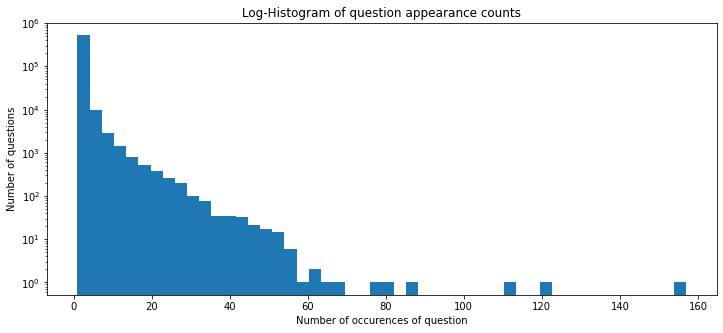

In [ ]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [ ]:
qids.value_counts().shape

(537933,)

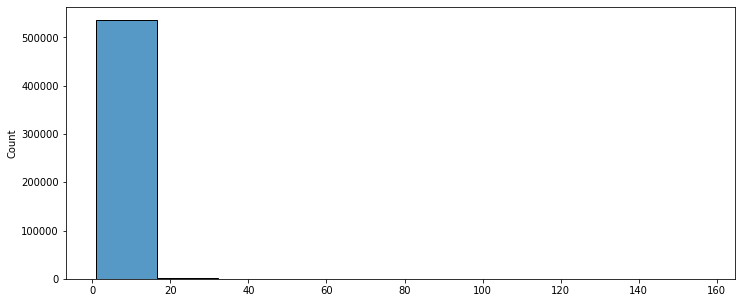

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data = qids.value_counts(), bins = 10)

In [ ]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

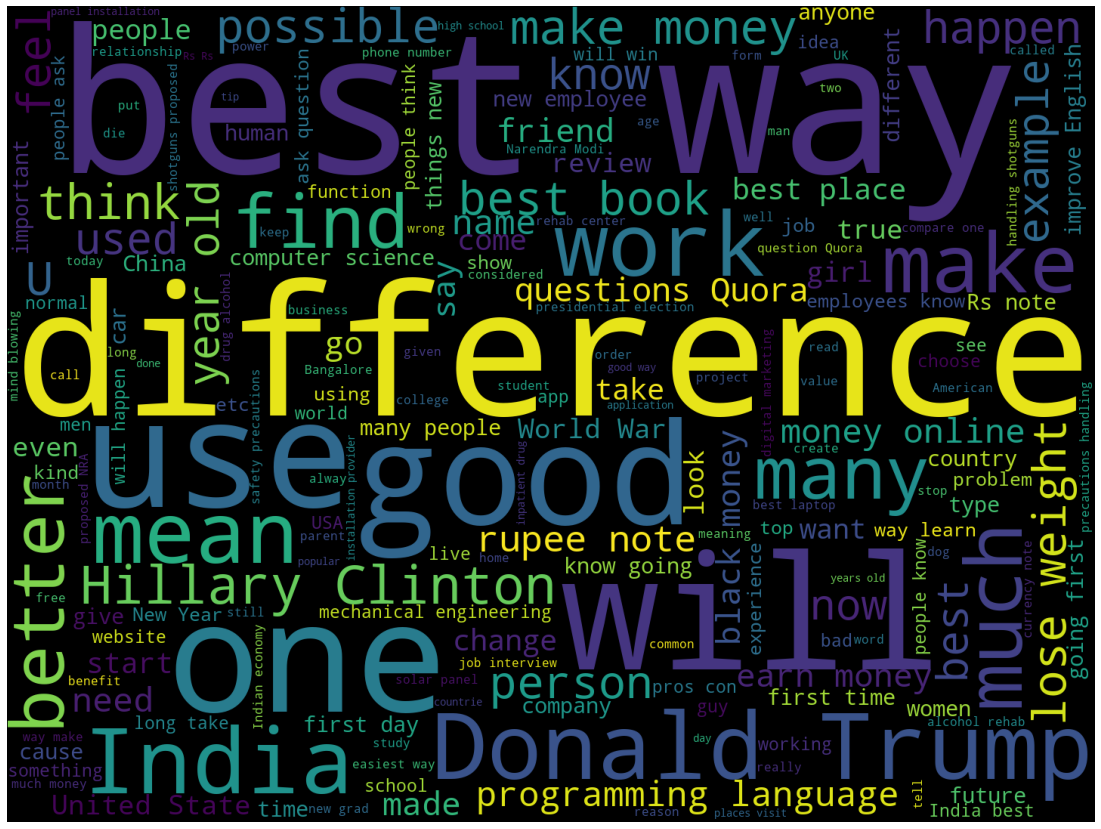

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


In [ ]:
qmarks = np.mean(test_qs.apply(lambda x: '?' in x))
math = np.mean(test_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(test_qs.apply(lambda x: '.' in x))
capital_first = np.mean(test_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(test_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(test_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.39%
Questions with [math] tags: 0.17%
Questions with full stops: 6.90%
Questions with capitalised first letters: 99.78%
Questions with capital letters: 99.94%
Questions with numbers: 12.66%


In [ ]:
pal = sns.color_palette()

In [ ]:
pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
dist_train.loc[(dist_train > 49) & (dist_train < 51)]

3         50
136       50
157       50
230       50
315       50
          ..
808369    50
808373    50
808375    50
808445    50
808488    50
Length: 15270, dtype: int64

In [ ]:
len(train_qs[3])

50

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


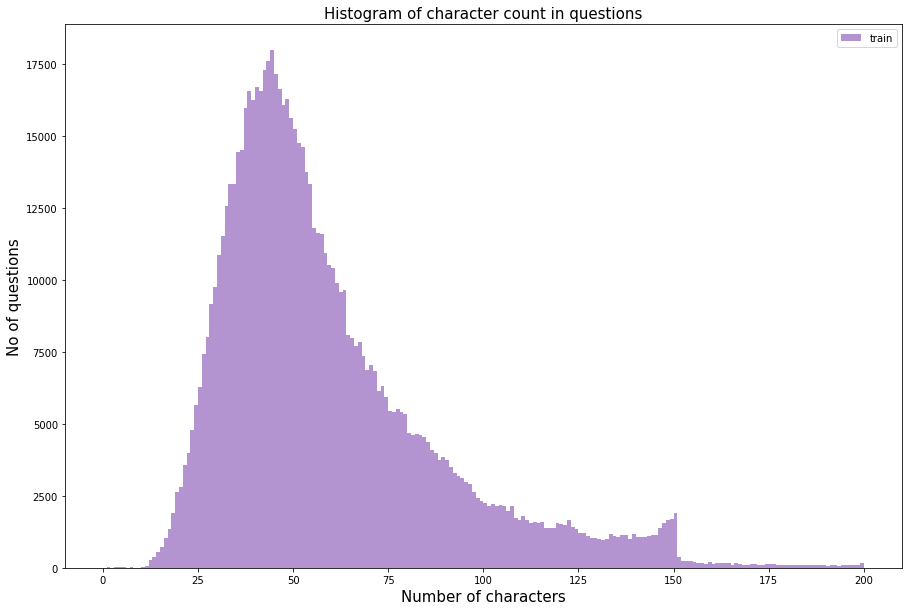

In [ ]:
dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[4],alpha = 0.7, label='train')
# plt.hist(dist_test, bins=200, range=[0, 200], color=pal[2], alpha=0.5, label='test')
plt.title('Histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('No of questions', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

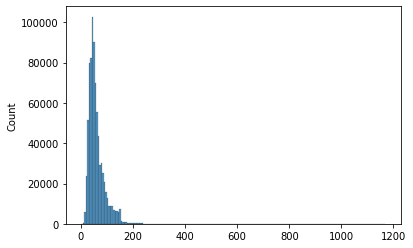

In [ ]:
sns.histplot(dist_train, bins=200)

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


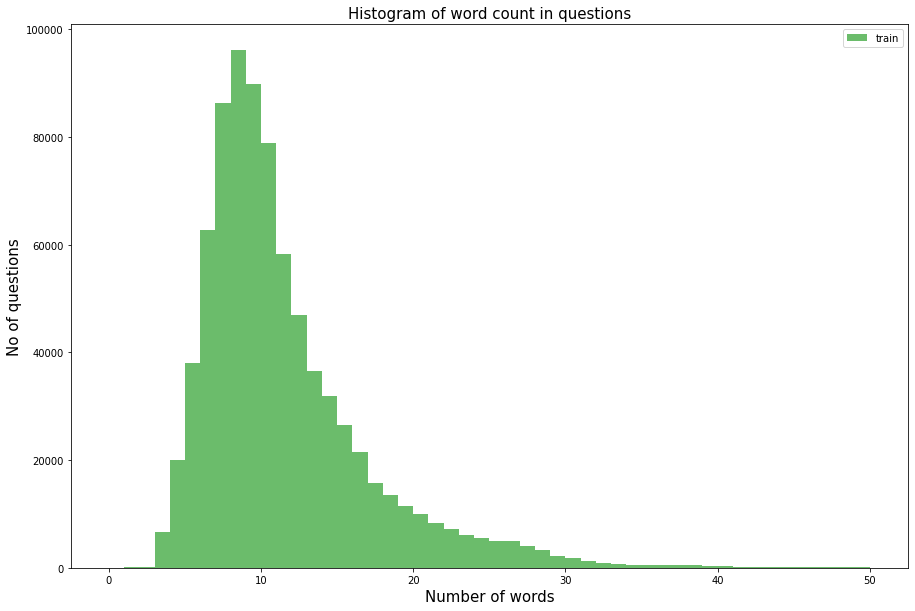

In [ ]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], alpha = 0.7,label='train')
# plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1],alpha=0.5, label='test')
plt.title('Histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('No of questions', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [ ]:
df_train['q1len'] = df_train['question1'].str.len()
df_train['q2len'] = df_train['question2'].str.len()

df_train['q1_n_words'] = df_train['question1'].apply(lambda row: len(str(row).split(" ")))
df_train['q2_n_words'] = df_train['question2'].apply(lambda row: len(str(row).split(" ")))

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), str(row['question1']).split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df_train['word_share'] = df_train.apply(normalized_word_share, axis=1)
df_train.head(15)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66.0,57.0,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51.0,88.0,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73.0,59.0,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50.0,65.0,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76.0,39.0,13,7,0.100000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86.0,90.0,16,16,0.258065
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,19.0,62.0,4,11,0.000000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,30.0,41.0,7,9,0.250000
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,31.0,37.0,8,8,0.375000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,60.0,49.0,9,9,0.166667


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,question1_arr,question2_arr,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[story, kohinoor, koh, noor, diamond]","[would, happen, indian, government, steal, koh...",0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increase, speed, internet, connection, use, vpn]","[internet, speed, increase, hack, dns]",0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mentally, lonely, solve]","[find, remainder, math, 23, 24, math, divide, ...",0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]",0.100000
...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,,,0.440000
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,,,0.312500
404287,404287,537928,537929,What is one coin?,What's this coin?,0,,,0.142857
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,,,0.025000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


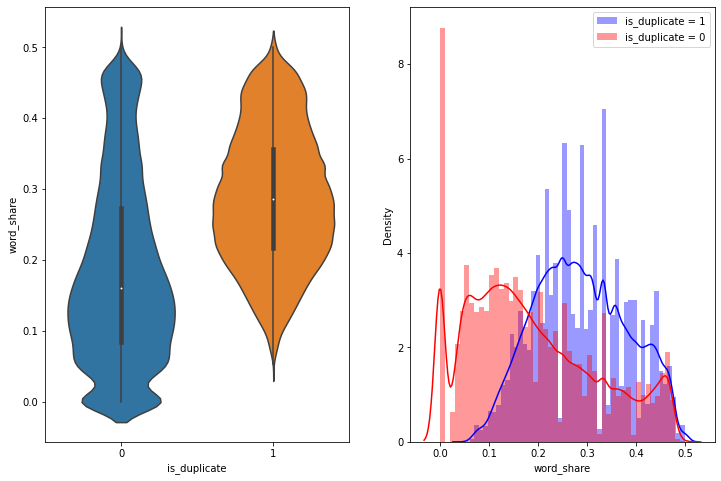

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df_train[10000:100000])
plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_duplicate'] == 1.0]['word_share'], color = 'blue', label="is_duplicate = 1")
sns.distplot(df_train[df_train['is_duplicate'] == 0.0]['word_share'], color = 'red', label="is_duplicate = 0")
plt.legend()

## Clustering

In [ ]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm


In [ ]:
len(xx)

3

In [ ]:
type(xx[0])

list

In [ ]:
type(xx[1])

list

In [ ]:
type(xx[2])

list

In [ ]:
len(xx[0])

577240

In [ ]:
len(xx[1])

577240

In [ ]:
xx = pd.read_pickle("/content/drive/MyDrive/gatech/processed_data_2.pkl")

for i in range(0, len(xx[0])):
  xx[0][i] = tuple(xx[0][i])
for i in range(0, len(xx[1])):
  xx[1][i] = tuple(xx[1][i])

q = set(xx[0] + xx[1])

print(len(q))
q = list(q)

for i in range(0, len(q)):
  q[i] = " ".join(list(q[i]))

508628

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 3.1 MB 19.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.5 MB/s 
     |████████████████████████████████| 61 kB 531 kB/s 
     |████████████████████████████████| 596 kB 66.7 MB/s 
     |████████████████████████████████| 895 kB 35.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=0c90b582b93b3f0dbea347c4777160cd857fce5c92e13b8bc4208f1442a092c9
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
len(q)

508628

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentence_embeddings = []

for sentence in tqdm(q) :
  sentence_embeddings.append(model.encode(sentence))
# sentence_embeddings = model.encode(q)

100%|██████████| 508628/508628 [2:22:21<00:00, 59.55it/s]


In [ ]:
with open("/content/drive/MyDrive/gatech/sentence_embedding_all-MiniLM-L6-v2_sentence_transformer.pkl", 'wb') as f:
    pickle.dump(sentence_embeddings, f)

In [ ]:
for i in range(0, len(sentence_embeddings)):
  print(sentence_embeddings[i].shape)
  # print(type(sentence_embeddings))

(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
(384,)
